In [25]:
MODEL_PATH = 'architectures/'
DATASET_PATH = 'dataset/'
RANDOM_SEED = 42 # Set to `None` for the generator uses the current system time.

# Importing the necessary packages

In [26]:
# If you are running on `Binder`, then it is no need to set up the packages again
# %pip install -r requirements.txt

# ---OR---

# %pip install tensorflow==2.10.1 numpy==1.26.4 pandas scikit-learn imblearn matplotlib seaborn

In [27]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from imblearn.over_sampling import SMOTE

import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from tensorflow.keras.layers import Input, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.layers import Conv1D, MaxPool1D
from tensorflow.keras.optimizers import Adam

import matplotlib.pyplot as plt
import seaborn as sns

import sys
import os
import utils

np.random.seed(RANDOM_SEED)

# Getting Relevant Data

In [28]:
data = pd.read_csv(os.path.join(DATASET_PATH, 'fraudTest.csv'), index_col=0)

# Credit Card Fraud Dataset Fields

| Field # | Field Name | Description |
|---------|------------|-------------|
| 1 | **trans_date_trans_time** | Date and time when transaction occurred |
| 2 | **cc_num** | Credit card number of customer |
| 3 | **merchant** | Name of merchant where transaction occurred |
| 4 | **category** | Category of merchant (e.g., retail, food, etc.) |
| 5 | **amt** | Amount of transaction |
| 6 | **first** | First name of credit card holder |
| 7 | **last** | Last name of credit card holder |
| 8 | **gender** | Gender of credit card holder |
| 9 | **street** | Street address of credit card holder |
| 10 | **city** | City of credit card holder |
| 11 | **state** | State of credit card holder |
| 12 | **zip** | ZIP code of credit card holder |
| 13 | **lat** | Latitude location of credit card holder |
| 14 | **long** | Longitude location of credit card holder |
| 15 | **city_pop** | Population of credit card holder's city |
| 16 | **job** | Occupation of credit card holder |
| 17 | **dob** | Date of birth of credit card holder |
| 18 | **trans_num** | Transaction number |
| 19 | **unix_time** | UNIX timestamp of transaction |
| 20 | **merch_lat** | Latitude location of merchant |
| 21 | **merch_long** | Longitude location of merchant |
| 22 | **is_fraud** | Target class indicating whether transaction is fraudulent (1) or legitimate (0) |

In [29]:
data['is_fraud'].value_counts()

is_fraud
0    553574
1      2145
Name: count, dtype: int64

In [30]:
data.isnull().any().sum()

0

no mising data

# Feature Engineering

In [31]:
data = utils.feature_engineering(data)

# Analysis

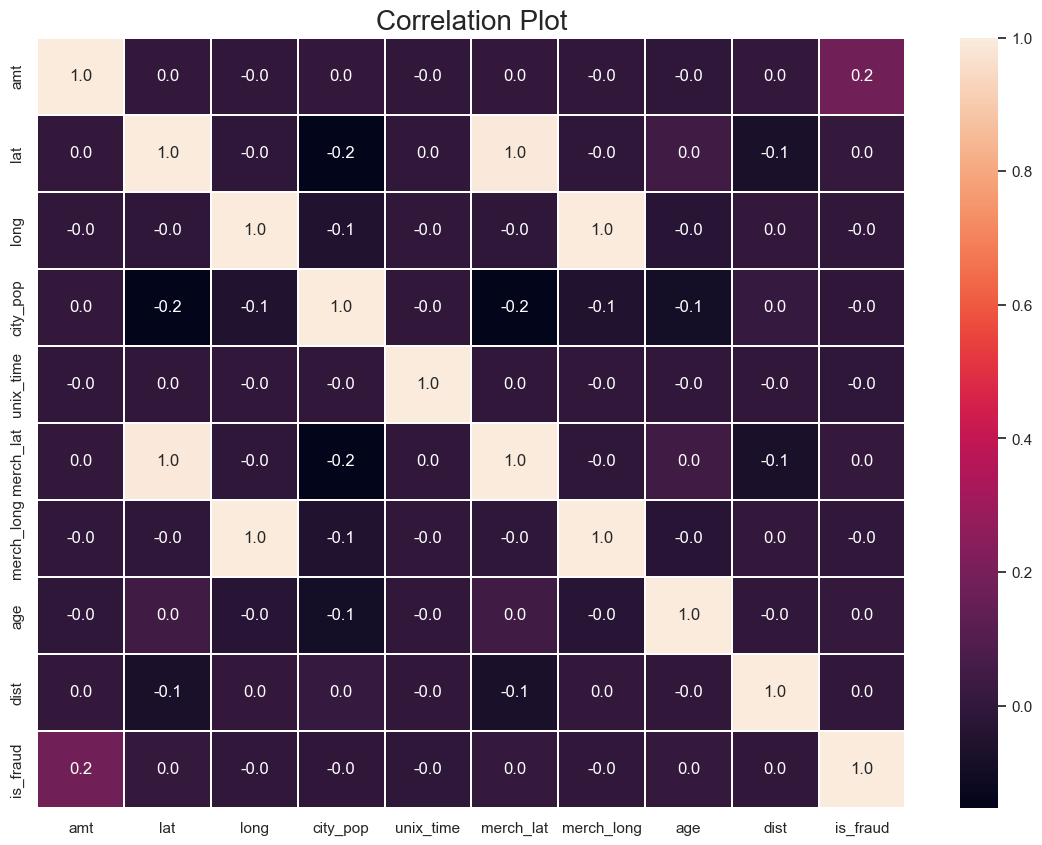

In [32]:
float_types_columns = []
for col in data:
    try:
        data[col].astype('float')
        float_types_columns.append(col)
    except:
        continue

plt.figure(figsize = (14,10))
plt.title('Correlation Plot', size = 20)
corr = data[float_types_columns].corr()
sns.set(rc={'figure.figsize':(13.7,8.27)})
sns.heatmap(corr,xticklabels=corr.columns,yticklabels=corr.columns,linewidths=.1,fmt='.1f',annot=True)
plt.show()

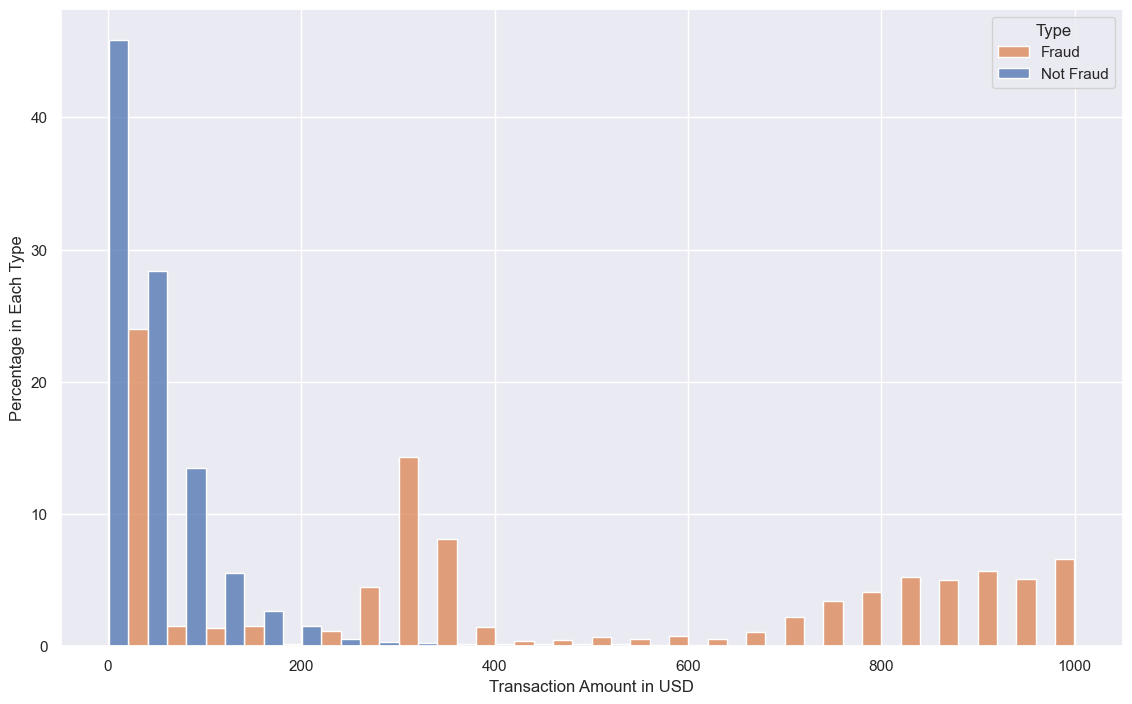

In [33]:
df = data
ax=sns.histplot(x='amt',data=df[df.amt<=1000],hue='is_fraud',stat='percent',multiple='dodge',common_norm=False,bins=25)
ax.set_ylabel('Percentage in Each Type')
ax.set_xlabel('Transaction Amount in USD')
plt.legend(title='Type', labels=['Fraud', 'Not Fraud'])

In [34]:
# Get all the fraud data
fraud_data = data[data['is_fraud'] == 1]

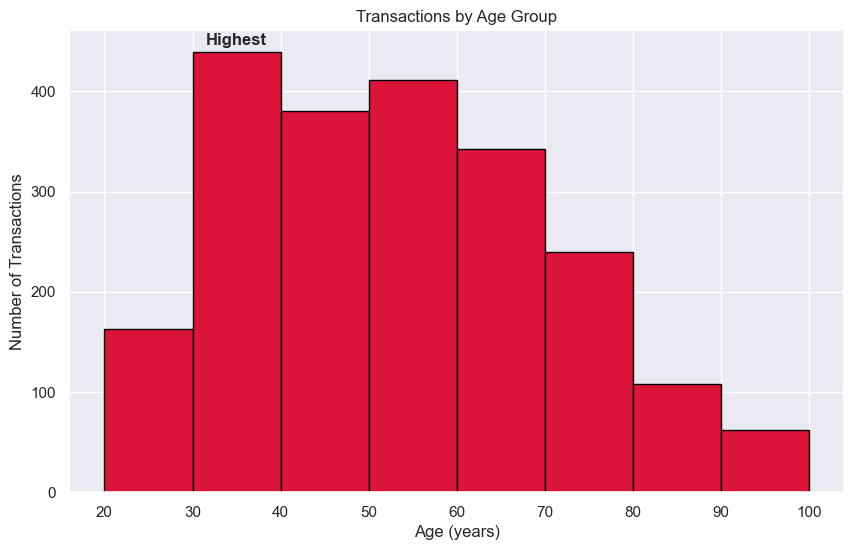

The age group with the most fraud transactions is 30 to 40 with 439 fraud transactions.


In [35]:
# Define age bins (from 18 to 90 in 10-year increments)
age_bins = range(data['age'].min(), data['age'].max()+10, 10)

plt.figure(figsize=(10, 6))
plt.xlabel('Age (years)')
plt.ylabel('Number of Transactions')
plt.title('Transactions by Age Group')
plt.xticks(age_bins)

# Create the histogram
counts, bins, patches = plt.hist(fraud_data['age'], bins=age_bins, edgecolor='black', color='crimson')

# Annotate the age group with highest transactions
plt.annotate(f'Highest', 
             xy=(bins[counts.argmax()] + 5, counts.max()),
             xytext=(0, 5),
             textcoords='offset points',
             ha='center',
             fontweight='bold',
)

plt.show()

print(f"The age group with the most fraud transactions is {age_bins[counts.argmax()]} to {age_bins[counts.argmax()+1]} with {int(counts.max())} fraud transactions.")

<Axes: xlabel='gender', ylabel='count'>

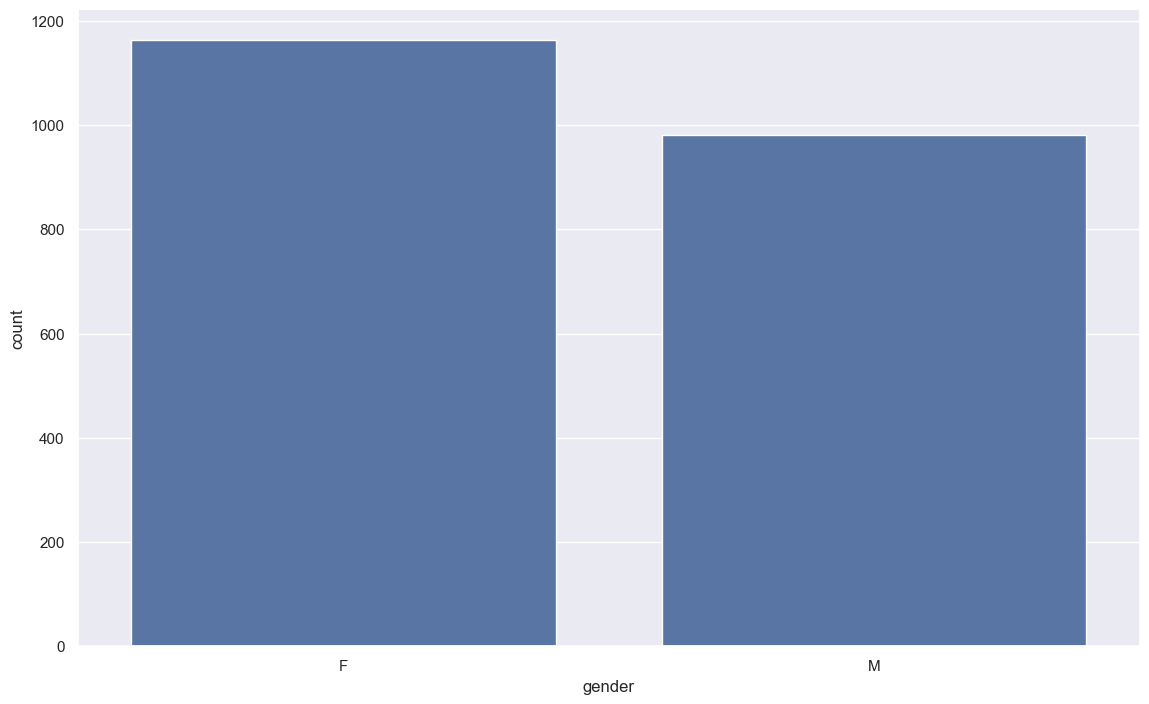

In [36]:
sns.countplot(x="gender", data=fraud_data)

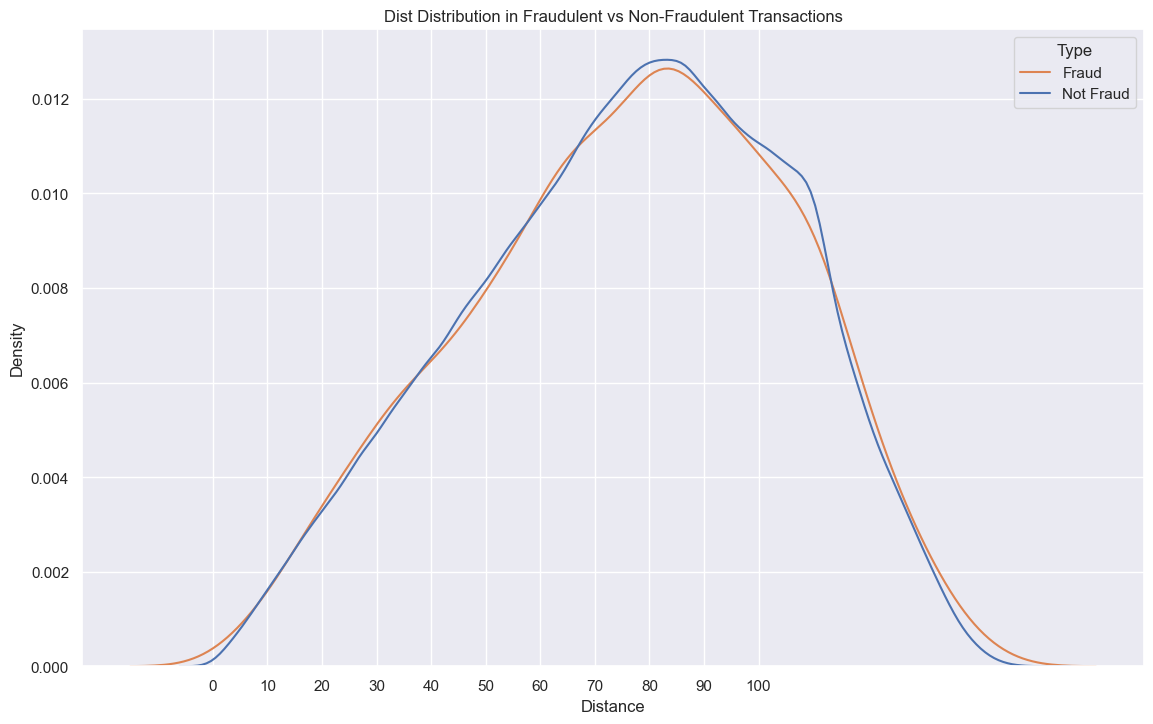

In [37]:
#Relation between distance vs fraud
import datetime as dt
import numpy as np
ax=sns.kdeplot(x='dist',data=df, hue='is_fraud', common_norm=False)
ax.set_xlabel('Distance')
ax.set_ylabel('Density')
plt.xticks(np.arange(0,110,10))
plt.title('Dist Distribution in Fraudulent vs Non-Fraudulent Transactions')
plt.legend(title='Type', labels=['Fraud', 'Not Fraud'])

In [38]:
# sns.countplot(x="state",data=df[df["is_fraud"]==1])

# Pre-processing

In [39]:
x, y, data, transformations = utils.pre_processing(data)

Ordinal-Encoding is applied for `['merchant', 'category', 'gender', 'age_group']`
SMOTE is applied


In [40]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

In [41]:
X_train.shape

(885718, 13)

# Model Building

## using scikit-learn

In [23]:
# from sklearn.model_selection import train_test_split
# from sklearn.linear_model import LogisticRegression
# from sklearn.tree import DecisionTreeClassifier
# from sklearn.ensemble import RandomForestClassifier
# from sklearn.naive_bayes import GaussianNB
# from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve, auc, accuracy_score,mean_absolute_error
# print(X_train.shape,y_train.shape,X_test.shape,y_test.shape)

# model_impl = RandomForestClassifier()
# # X_train = X_train.reshape(X_train.shape[0],1)
# # X_test = X_test.reshape(X_test.shape[0],1)
# model_impl.fit(X_train,y_train)
# pred_train=model_impl.predict(X_train)
# pred_test=model_impl.predict(X_test)

# accuracy_train = accuracy_score(pred_train,y_train)
# accuracy_test = accuracy_score(pred_test,y_test)
# confusionMatrix = confusion_matrix(y_test,pred_test)
# classificationReport = classification_report(y_test,pred_test)
# mae = mean_absolute_error(y_train,pred_train)
# # print("Model Implemented: ", 'Decision_tree')
# print("Accuracy on Training Set: ", accuracy_train)
# print('Accuracy on Validation Set: ', accuracy_test)
# print('Mean absolute error: ',mae)
# print('Confusion Matrix\n', confusionMatrix)
# print('Classification Report\n', classificationReport)

(2062670, 13) (2062670,) (515668, 13) (515668,)



KeyboardInterrupt



## using Tensorflow

In [ ]:
epochs = 50
model = Sequential()
model.add(Conv1D(64, 2, activation='relu', input_shape=(X_train.shape[1], 1)))
model.add(BatchNormalization())

model.add(Conv1D(32, 2, activation='elu'))
model.add(Dropout(0.3))
model.add(Dense(64, activation='relu'))
model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(1, activation='sigmoid'))

In [ ]:
model.summary()

In [ ]:
model.compile(optimizer=Adam(learning_rate=0.001), loss = 'binary_crossentropy', metrics=['accuracy'])

In [ ]:
callback = tf.keras.callbacks.EarlyStopping(
    monitor='val_loss',
    min_delta=0,
    patience=4,
    verbose=1,
    mode='auto',
    baseline=None,
    restore_best_weights=True
)
history = model.fit(X_train, y_train, epochs=epochs, validation_data=(X_test, y_test), verbose=1,callbacks = [callback])

In [ ]:
def plot_learningCurve(history, epoch):
  # Plot training & validation accuracy values
  epoch_range = range(1, epoch+1)
  plt.plot(epoch_range, history.history['accuracy'])
  plt.plot(epoch_range, history.history['val_accuracy'])
  plt.title('Model accuracy')
  plt.ylabel('Accuracy')
  plt.xlabel('Epoch')
  plt.legend(['Train', 'Val'], loc='upper left')
  plt.show()

  # Plot training & validation loss values
  plt.plot(epoch_range, history.history['loss'])
  plt.plot(epoch_range, history.history['val_loss'])
  plt.title('Model loss')
  plt.ylabel('Loss')
  plt.xlabel('Epoch')
  plt.legend(['Train', 'Val'], loc='upper left')
  plt.show()

In [ ]:
plot_learningCurve(history,len(history.epoch))

In [ ]:
y_predict = model.predict(X_test)

In [ ]:
y_predict_binary = np.round(y_predict).astype(int).squeeze()
classificationReport = classification_report(y_test, y_predict_binary)
print(classificationReport)

In [ ]:
confusionMatrix = confusion_matrix(y_test, np.round(y_predict).astype(int))
confusionMatrix

In [ ]:
# Save the entire ANN model
model.save(os.path.join(MODEL_PATH, 'architecture_1'))

In [ ]:
# train_set = pd.DataFrame(np.concatenate([X_train.squeeze(), np.expand_dims(y_train.to_numpy(), axis=1)], axis=1), 
#              columns=list(features) + ['is_fraud'])

# train_set.to_csv(os.path.join(DATASET_PATH, 'architecture_1_train_set.csv'))

In [ ]:
# test_set = pd.DataFrame(np.concatenate([X_test.squeeze(), np.expand_dims(y_test.to_numpy(), axis=1)], axis=1), 
#              columns=list(features) + ['is_fraud'])

# test_set.to_csv(os.path.join(DATASET_PATH, 'architecture_1_test_set.csv'))

In [ ]:
# processed_data.to_csv(os.path.join(DATASET_PATH, 'architecture_1_dataset.csv'))